In [48]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD 


#### 1.Generate some random data and try to fit in the data.
#### 2. using Basic Neural Networks to fit the Non linear data 
#### 3. Check the Metrics and plot the model data

In [49]:
def SimulData():
	# Simulate some data for training 
        omega = np.pi ; 
        xvar  = 0.01/3; 
        x_train = np.arange(0,1, 0.0025 ) 
        x_train = x_train + xvar * np.random.randn(x_train.size);
        y_train  = np.sin( x_train  * omega) +  0.1 * np.random.randn(x_train.size);
        x_train = np.reshape(x_train, (-1,1))
        #x_train = np.concatenate( (x_train, np.square(x_train) ), axis=1);

        x_test = np.arange(0,1, 0.01 ) 
        x_test = x_test + xvar * np.random.randn(x_test.size);
        y_test  = np.sin( x_test  * omega )+  0.1 * np.random.randn(x_test.size) 
        x_test = np.reshape(x_test, (-1,1))
        #x_test = np.concatenate( (x_test, np.square(x_test) ), axis=1);

        return (x_train,y_train) , (x_test, y_test)

In [50]:
batch_size = 10
epochs = 100

In [51]:
(x_train,y_train),(x_test,y_test)=SimulData()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((400, 1), (400,), (100, 1), (100,))

In [52]:
y_test[0:10]

array([-0.08959212,  0.11781855, -0.03492657,  0.07826878,  0.09385776,
        0.07150472,  0.30691973,  0.11284992,  0.25686651,  0.38431781])

In [53]:
Model=Sequential()
# Need to add a Dense layer with non linear activation function
Model.add(Dense(2, input_shape=(1,))) # If no Activation function is specified by default it is linear.
Model.add(Dense(units=2,activation="tanh",input_shape=(1,))) # Can have any number of layers
Model.add(Dense(units=1,activation="linear",input_shape=(1,))) # No need to specify the input size after the first hidden layer
Model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [54]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
Model.compile(optimizer=sgd,loss="mse",metrics=["mse"])


In [55]:
Model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,
                    validation_data=(x_test, y_test))

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 0s 549us/step - loss: 0.1677 - mean_squared_error: 0.1677 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 2/100
400/400 [==============================] - 0s 128us/step - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.1105 - val_mean_squared_error: 0.1105
Epoch 3/100
400/400 [==============================] - 0s 117us/step - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 4/100
400/400 [==============================] - 0s 108us/step - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 5/100
400/400 [==============================] - 0s 133us/step - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 6/100
400/400 [==============================] - 0s 156us/step - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.10

400/400 [==============================] - 0s 131us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 51/100
400/400 [==============================] - 0s 126us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 52/100
400/400 [==============================] - 0s 128us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 53/100
400/400 [==============================] - 0s 100us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 54/100
400/400 [==============================] - 0s 141us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 55/100
400/400 [==============================] - 0s 196us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 56/100
400/

400/400 [==============================] - 0s 102us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 100/100
400/400 [==============================] - 0s 116us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0104 - val_mean_squared_error: 0.0104


In [56]:
y_pred=Model.predict(x_test)
y_pred[:5]

array([[0.06515336],
       [0.09636331],
       [0.11009586],
       [0.13651848],
       [0.16054225]], dtype=float32)

In [57]:
score=Model.evaluate(x_test,y_test) # Returns the loss value & metrics values for the model in test mode.
print('Loss & Metrics', score)
score = Model.evaluate(x_test, y_test)
print('Test loss:mse (selected in model compile', score[0])
print('Test Metrics:mse (selected in model compile ', score[1])
print('Type of score is',type(score))
print(Model.summary())

100/100 [==============================] - 0s 50us/step
Loss & Metrics [0.010413844585418702, 0.010413844585418702]
100/100 [==============================] - 0s 53us/step
Test loss:mse (selected in model compile 0.010413844585418702
Test Metrics:mse (selected in model compile  0.010413844585418702
Type of score is <class 'list'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
print(score)

[0.010413844585418702, 0.010413844585418702]


In [59]:
Model.metrics_names

['loss', 'mean_squared_error']

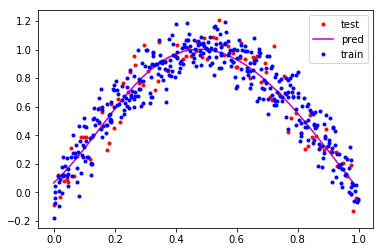

In [60]:
tst = plt.plot(x_test,y_test,'r.',label='test'); 
pred = plt.plot(x_test,y_pred,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

plt.legend()
plt.show()

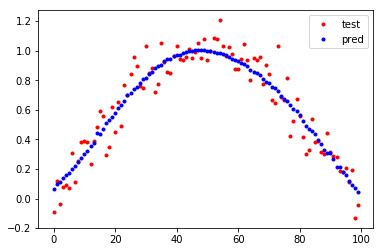

In [63]:
test= plt.plot(y_test,'r.',label='test'); 
pred=plt.plot(y_pred,'b.',label='pred')
plt.legend()
plt.show()